In [1]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os

<AxesSubplot:title={'center':'Herkenning vs verkeerd herkend'}, ylabel='Files'>

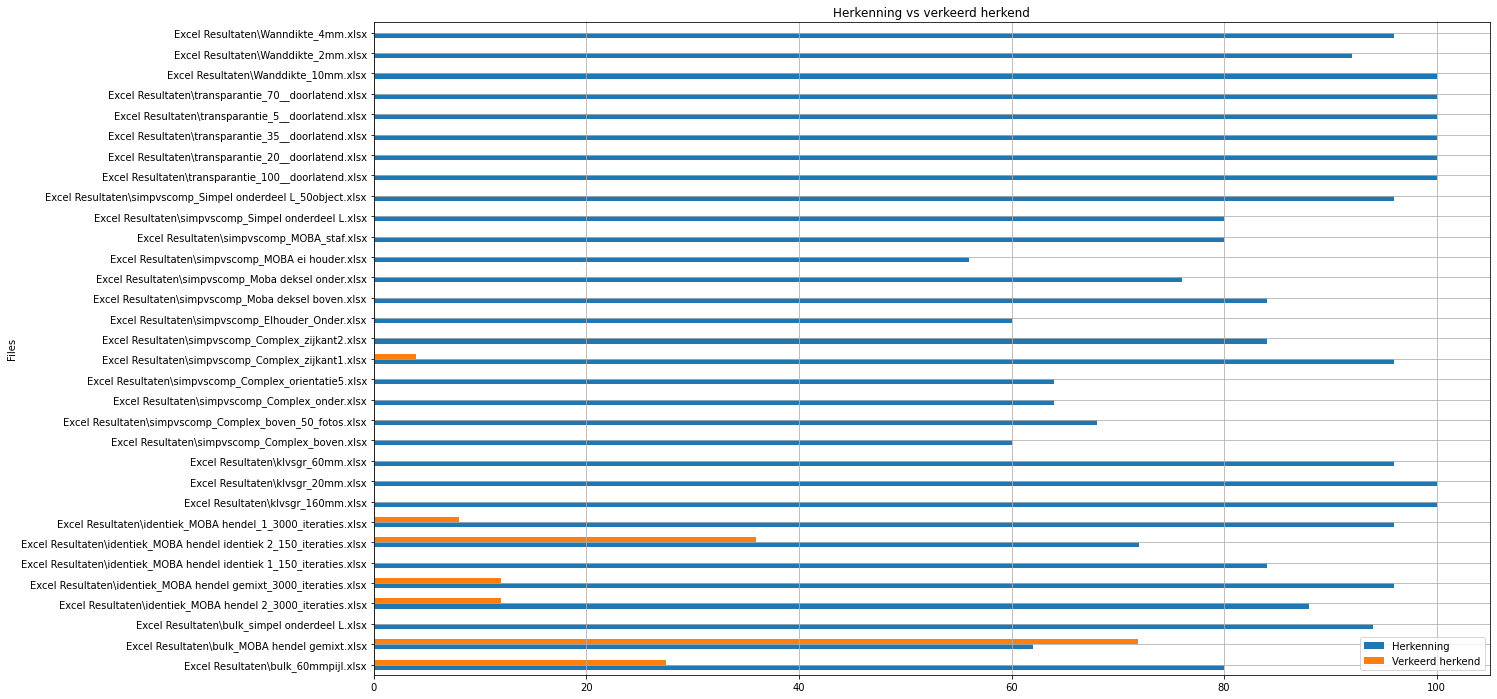

In [2]:
#This program retrieves the recognition per excel sheet
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         filename = filename.replace('Excel Resultaten', '')
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
#Lists to store all calculated values
herkenning = []
verkeerd_herkenning = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the G column (Herkenning)
    df = pd.read_excel(sheet, usecols="g")
    #Insert the values
    herkenning.insert(i, df.iat[27,0] * 100)
    #Read column H (Verkeerd herkend)
    df = pd.read_excel(sheet, usecols="h")
    verkeerd_herkenning.insert(i, df.iat[27,0] * 100)
    i = i + 1


#Create dataframe
df = pd.DataFrame()
#Add three columns with the names and the corresponding percentage
df['Herkenning'] = herkenning
df['Verkeerd herkend'] = verkeerd_herkenning
df['Files'] = excel

#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Files', kind="barh", figsize=(20,12), xlabel="Files", ylabel = "Percentages", title="Herkenning vs verkeerd herkend", grid=True)